In [12]:
import sys

sys.path.append("../..")

In [13]:
import matplotlib.pyplot as plt

from emgrep.datasets.EMGRepDataloader import EMGRepDataloader

In [14]:
data_selection = [(subject, day, time) for subject in [1] for day in [1] for time in [1, 2]]

emgrepdl = EMGRepDataloader(
    data_path="../../data/01_raw/",
    data_selection=data_selection,
    positive_mode="subject",
)

In [15]:
data_loader = emgrepdl.get_dataloader()

In [16]:
len(data_loader)

954

In [25]:
emg, stimulus, info = next(iter(data_loader))

In [26]:
def plot_samples(signals, labels, title, block_size=300):
    signals = signals.reshape(-1, signals.shape[-1])
    labels = labels.reshape(-1)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    # normalize the signals to [0, 1]
    signals = (signals - signals.min()) / (signals.max() - signals.min())

    ax.plot(signals)
    ax.plot(labels, color="red")    
    
    # plot the block boundaries
    for i in range(1, len(signals) // block_size):
        ax.axvline(x=i * block_size, color="black", linestyle="--")
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")

    ax.set_xticklabels([f"{i/2000}s" for i in ax.get_xticks()])

    ax.set_title(title)
    plt.show()

/var/folders/nk/3gsn9f8x0h97w4pz6qqkzf7h0000gn/T/ipykernel_55700/3142923838.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{i/2000}s" for i in ax.get_xticks()])


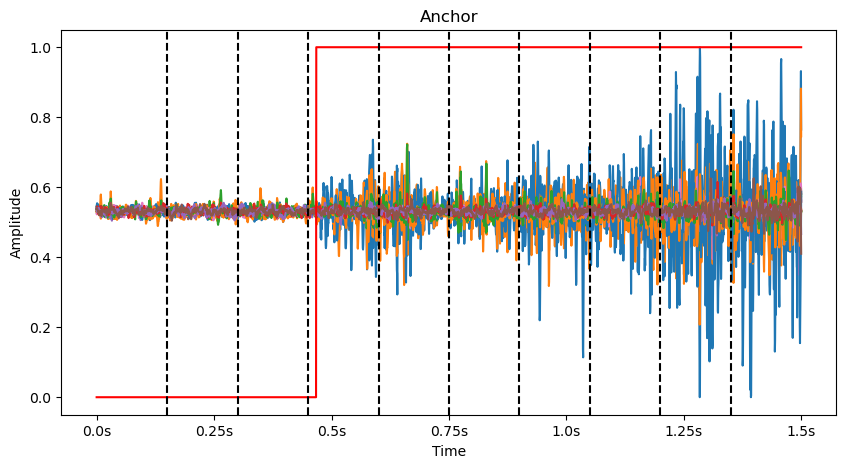

In [27]:
x = emg[0][0]
y = stimulus[0][0]
plot_samples(x, y, "Anchor")

/var/folders/nk/3gsn9f8x0h97w4pz6qqkzf7h0000gn/T/ipykernel_55700/3142923838.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{i/2000}s" for i in ax.get_xticks()])


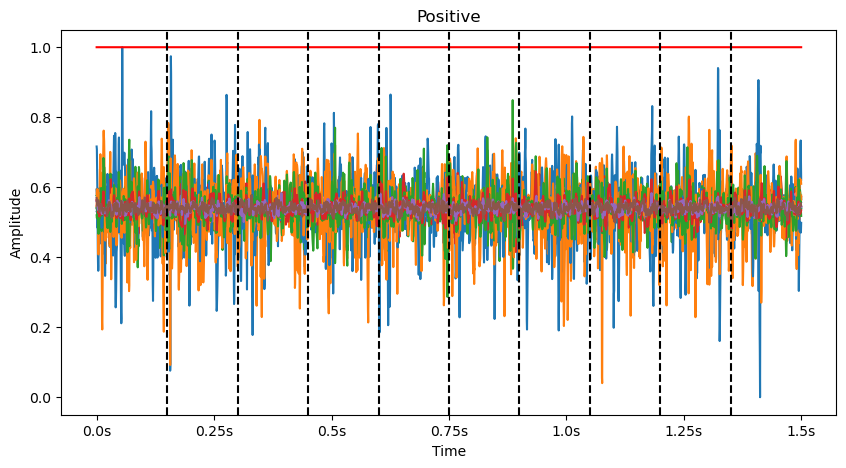

In [28]:
px = emg[0][1]
py = stimulus[0][1]
plot_samples(px, py, "Positive")

In [29]:
emg.shape

torch.Size([1, 2, 10, 300, 16])